In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
import datetime as dt

In [8]:
start_date=dt.datetime( 2024,10,25)
end_date=dt.datetime( 2025,10,25) 

my_tickers=['GOOG','MSFT','META','AMZN','AAPL']
stocks=yf.download (tickers=my_tickers, start=start_date, end=end_date)

def rounding(dataset):
    nums=dataset.select_dtypes(include='number')
    for col in nums.columns:
        nums[col]=nums[col].round(decimals=2)
    return dataset

stocks.info()

C:\Users\dishi\AppData\Local\Temp\ipykernel_9900\250050663.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stocks=yf.download (tickers=my_tickers, start=start_date, end=end_date)
[*********************100%***********************]  5 of 5 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-10-25 to 2025-10-24
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   250 non-null    float64
 1   (Close, AMZN)   250 non-null    float64
 2   (Close, GOOG)   250 non-null    float64
 3   (Close, META)   250 non-null    float64
 4   (Close, MSFT)   250 non-null    float64
 5   (High, AAPL)    250 non-null    float64
 6   (High, AMZN)    250 non-null    float64
 7   (High, GOOG)    250 non-null    float64
 8   (High, META)    250 non-null    float64
 9   (High, MSFT)    250 non-null    float64
 10  (Low, AAPL)     250 non-null    float64
 11  (Low, AMZN)     250 non-null    float64
 12  (Low, GOOG)     250 non-null    float64
 13  (Low, META)     250 non-null    float64
 14  (Low, MSFT)     250 non-null    float64
 15  (Open, AAPL)    250 non-null    float64
 16  (Open, AMZN)    250 non-null    float64
 17  (Open, GOOG)    

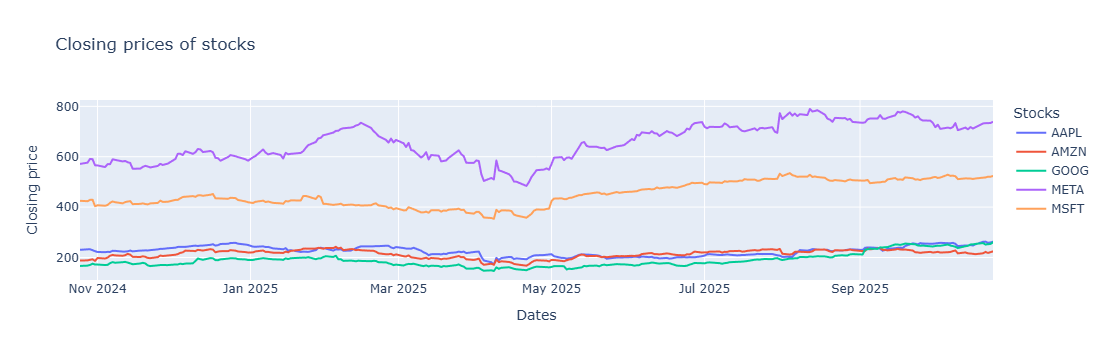

In [24]:
closes=stocks.loc[:,'Close']
closes=closes.reset_index()

melts=pd.melt( closes, id_vars='Date', var_name='Stocks', value_name='Closing prices')
melts.head(2)

fig1=px.line( melts, color='Stocks', x='Date', y='Closing prices', labels={'Date':'Dates',
                                                                           'Closing prices':'Closing price'}, 
                                                                           title='Closing prices of stocks')

fig1.show()

In [48]:
closes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    250 non-null    datetime64[ns]
 1   AAPL    250 non-null    float64       
 2   AMZN    250 non-null    float64       
 3   GOOG    250 non-null    float64       
 4   META    250 non-null    float64       
 5   MSFT    250 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 11.8 KB


In [52]:
closes_ndate=closes.iloc[:,1:]
corrs=closes_ndate.corr()
corrs

Ticker,AAPL,AMZN,GOOG,META,MSFT
Ticker,,,,,
AAPL,1.000000,0.524288,0.685214,0.269902,0.203330
AMZN,0.524288,1.000000,0.642699,0.742611,0.611216
GOOG,0.685214,0.642699,1.000000,0.683863,0.697352
META,0.269902,0.742611,0.683863,1.000000,0.842512
MSFT,0.203330,0.611216,0.697352,0.842512,1.000000


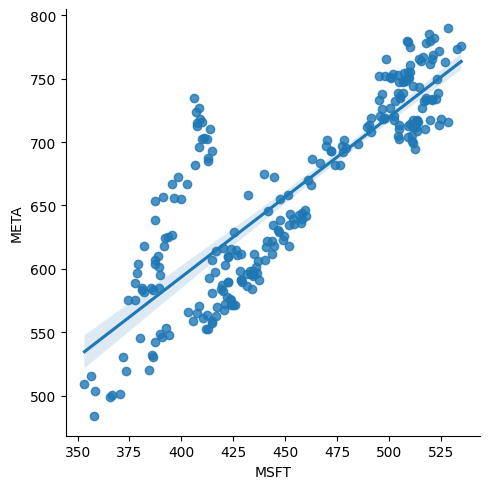

In [56]:
sns.lmplot(closes, x='MSFT', y='META') # high correlation between the two

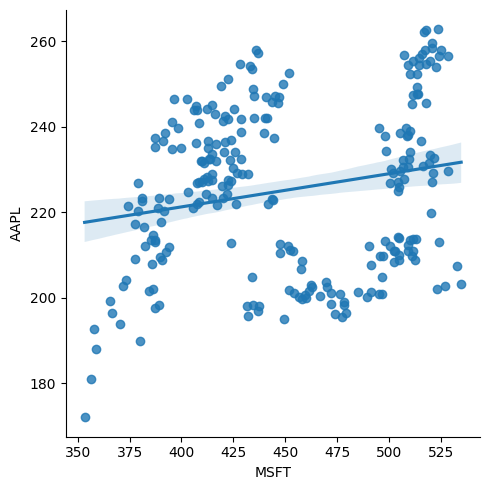

In [54]:
sns.lmplot(closes, x='MSFT', y='AAPL') # low correlation between the two